# Implement perceptron algorithm on synthetic data

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

## Generating two random clusters of 100 points each with d =2 

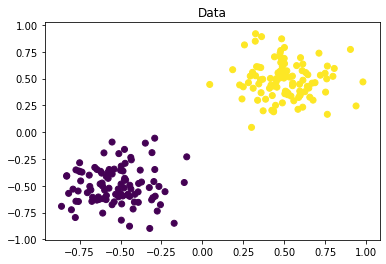

In [103]:
# Generate data
d = 2
means1 = np.array([0.5,0.5])
cov = 0.03*np.eye(d)
X1 = np.random.multivariate_normal(means1,cov,100)
Y1 = np.ones(len(X1))
means2 = np.array([-0.5,-0.5])
X2 = np.random.multivariate_normal(means2,cov,100)
Y2 = np.zeros(len(X1))
bias = np.random

# Plot to verify data
X, Y = np.concatenate([X1,X2]), np.concatenate([Y1,Y2])
plt.figure()
plt.scatter(X[:,0],X[:,1],c=Y)
plt.title('Data')
plt.show()
X = np.concatenate([np.ones((X.shape[0],1)), X],axis=1)

In [104]:
X.shape

(200, 3)

## Building perceptron algorithm

In [106]:
def perceptrain(X,Y,alpha,T):
  w = np.zeros(X.shape[1])
  y_hat = np.zeros(len(X))
  cost = [] # SSE cost function
  error = np.zeros(len(X)) # SSE error
  cnt = 0
  missed = []
  n = 0

  while n < T:
    for i in range(len(X)):

      # Equation of perceptron
      activation = np.dot(X[i],w)

      # Predict label of point based on perceptron algo
      if activation > 0 :
        y_hat[i] = 1
      else:
        y_hat[i] = 0

      # Update weights
      for j in range(0,len(w)):
        w[j] = w[j] + alpha * (Y[i] - y_hat[i]) * X[i][j]
      
    # Next epoch
    n += 1 
    cnt = 0
    # Calculate error at each epoch for all samples
    for i in range(len(Y)):
      error[i] = (Y[i] - y_hat[i]) ** 2

      # Calculate number of mis-classified samples
      if(Y[i] != y_hat[i]):
        cnt += 1



    cost.append(0.5 * np.sum(error))
    missed.append(cnt)

  return w,cost,missed

###  For setting 1 <br>  Define hyperparameters 


In [107]:
alpha = 1
T = 100


w_1, cost_1, missed_1 = perceptrain(X,Y,alpha,T)

In [108]:
w_1

array([0.        , 1.00027474, 1.56362292])

### Checking Convergence

Text(0.5, 1.0, 'Error vs. Training Epoch')

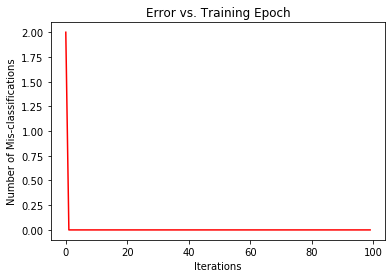

In [109]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(T), missed_1, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Number of Mis-classifications')  
ax.set_title('Error vs. Training Epoch') 

<ul> 
    <li> We can see that the algorithm converges very quickly as the data is very well separated. </li>
    <li> The perceptron algorithm finds the perfect decsion boundary in the first few iterations. </li>
    </ul>

Text(0.5, 1.0, 'Data')

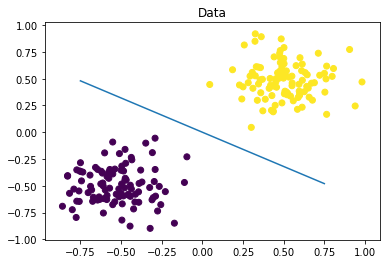

In [110]:
# For decison boundary
x_vals_gd = np.arange(-0.75, 1, 0.25)
y_vals_gd = -(w_1[0] + w_1[1] * x_vals_gd)/w_1[2]
plt.plot(x_vals_gd,y_vals_gd,label='Decision Boundary SGD')
plt.scatter(X[:,1],X[:,2],c=Y)
plt.title('Data')

## Checking for dataset with larger variance of data clusters

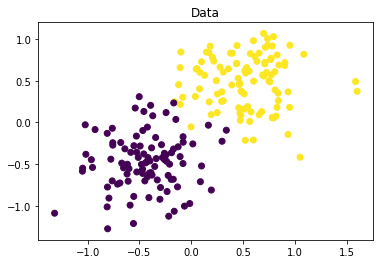

In [115]:
d = 2
means1 = np.array([0.5,0.5])
cov_a = 0.1*np.eye(d)
X1_a = np.random.multivariate_normal(means1,cov_a,100)
Y1_a = np.ones(len(X1_a))
means2 = np.array([-0.5,-0.5])
X2_a = np.random.multivariate_normal(means2,cov_a,100)
Y2_a = np.zeros(len(X1_a))
X_over, Y_over = np.concatenate([X1_a,X2_a]), np.concatenate([Y1_a,Y2_a])
plt.figure()
plt.scatter(X_over[:,0],X_over[:,1],c=Y_over)
plt.title('Data')
plt.show()
X_over = np.concatenate([np.ones((X_over.shape[0],1)), X_over],axis=1)

###  For setting 2 <br>  Define hyperparameters 


Text(0.5, 1.0, 'Error vs. Training Epoch')

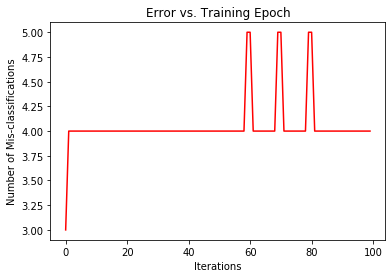

In [116]:
# For setting 2
# Define hyperparameters 

alpha = 1
T = 100

w_2, cost_2, missed_2 = perceptrain(X_over,Y_over,alpha,T)

# Plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(T), missed_2, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Number of Mis-classifications')  
ax.set_title('Error vs. Training Epoch') 


In [117]:
w_2

array([-1.        ,  3.07281414,  5.79868185])

Text(0.5, 1.0, 'Data')

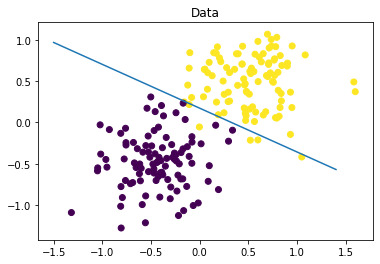

In [118]:
# For decison boundary
x_vals_gd = np.arange(-1.5, 1.5, 0.1)
y_vals_gd = -(w_2[0] + w_2[1] * x_vals_gd)/w_2[2]
plt.plot(x_vals_gd,y_vals_gd,label='Decision Boundary SGD')
plt.scatter(X_over[:,1],X_over[:,2],c=Y_over)
plt.title('Data')


<ul>
<li> We can observe that this algorithm does not converge completely to zero error. This is expected because there can be no perfectly separated decision boundary for overlaping clusters. </li> 
    <li>We can see from the error plot that the number of mis-classified sharply increases and keeps bouncing up and down because the perceptron is trying to adjust for each point.  </li>
    <li>Over 100 epochs, it settles down to mis-classifying 4 points (of the yellow cluster) in this case. </li>
    <li>We can check the decision boundary plot to spot the 4 yellow points that are mis-classified. These clusters are only slightly overlapped so we are getting decent decision boundary. If there is more overlap, perceptron is not suitable for classification. </li>
</ul>

_____________________________________________________________________________________________________